#### Importing all the necessary libraries


In [2]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the scaled data as suggested in the workshop

In [3]:
data, target = load_svmlight_file("diabetes_scale.txt")
df = pd.DataFrame(data.toarray())
df['label'] = target.astype(int)
df

,0,1,2,3,4,5,6,7,label
0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333,-1
1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333,-1
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000,1
4,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,-1
...,...,...,...,...,...,...,...,...,...
763,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
764,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000,1
765,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
766,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333,-1


#### Checking for the distributions of each scaled feature as the data we extracted is already pre-processed and scaled.

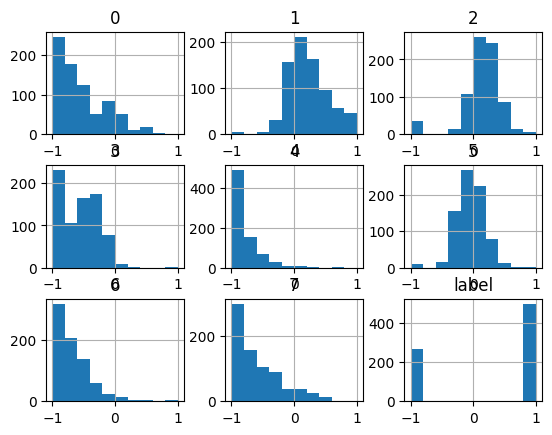

In [4]:
dummy = df.hist()

#### Splitting the data into train, validation and test sets

In [5]:
# Split the data into full training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    np.array(df.iloc[:, :-1]), np.array(df['label']), test_size=0.2, random_state=42)

# Split the full training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

- I will use the full training data to train the final model before checking on the test set as the data is already limited and hence i want to use the maximum amount of data to train my model.

#### Baseline Model Perceptron with default functions
    - step function to obtain the predictions based on threshold
    - learning rate : 0.1
    - Number of iteration: 1000

In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def step_function(self, x):
        return np.where(x >= 0, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perceptron learning algorithm
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.step_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

X = np.array(X_train)
y = np.array(y_train)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

Predictions: [1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1]
Validation Accuracy: 0.7073170731707317
Validation F1 Score: 0.7931034482758621


### As a first step i will focus on Activation functions to be used before output to account for the non-linearity of the output.

#### Using tanh function for predictions

In [7]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def tanh_function(self, x):
        k = np.tanh(x)
        return np.where(k >= 0, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perceptron learning algorithm
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.tanh_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.tanh_function(linear_output)

X = np.array(X_train)
y = np.array(y_train)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

Predictions: [1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1]
Validation Accuracy: 0.7073170731707317
Validation F1 Score: 0.7931034482758621


- I don't see much of an improvement and this is easy to understand as the step function looks similar to tanh, it's just that the transition is very smooth. at the max and min points allowing values other than the max and min values.

#### Using Relu function for predictions

In [8]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def relu_function(self, x):
        k = np.maximum(0, x)
        return np.where(k >= 0.25, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perceptron learning algorithm
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.relu_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.relu_function(linear_output)

X = np.array(X_train)
y = np.array(y_train)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

Predictions: [1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1]
Validation Accuracy: 0.7642276422764228
Validation F1 Score: 0.8263473053892215


- Here, the F1 score is increased which is our main focus.
- So, continuing from this let's go to a more smooth function which is sigmoid.

#### Using Sigmoid Function for predictions 

In [9]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Perceptron learning algorithm
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

X = np.array(X_train)
y = np.array(y_train)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X, y)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

Predictions: [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 1 1 1]
Validation Accuracy: 0.7642276422764228
Validation F1 Score: 0.8342857142857143


- The F1-score is further improved and hence, i'll finalize my function to be sigmoid.

### Now, I want to update my perceptron class to visualize loss at each epoch to get more insights on what's happening inside the model for different parameters.

Epoch 1/1000, Train Loss: 0.639511201629328, Validation Loss: 0.7642276422764228
Epoch 2/1000, Train Loss: 0.6435845213849287, Validation Loss: 0.7154471544715447
Epoch 3/1000, Train Loss: 0.5987780040733197, Validation Loss: 0.6341463414634146
Epoch 4/1000, Train Loss: 0.615071283095723, Validation Loss: 0.6666666666666666
Epoch 5/1000, Train Loss: 0.6069246435845214, Validation Loss: 0.6178861788617886
Epoch 6/1000, Train Loss: 0.6109979633401222, Validation Loss: 0.6178861788617886
Epoch 7/1000, Train Loss: 0.5743380855397149, Validation Loss: 0.5853658536585366
Epoch 8/1000, Train Loss: 0.5539714867617108, Validation Loss: 0.5040650406504065
Epoch 9/1000, Train Loss: 0.5213849287169042, Validation Loss: 0.4715447154471545
Epoch 10/1000, Train Loss: 0.5336048879837068, Validation Loss: 0.5691056910569106
Epoch 11/1000, Train Loss: 0.5458248472505092, Validation Loss: 0.5203252032520326
Epoch 12/1000, Train Loss: 0.47657841140529533, Validation Loss: 0.5365853658536586
Epoch 13/1000,

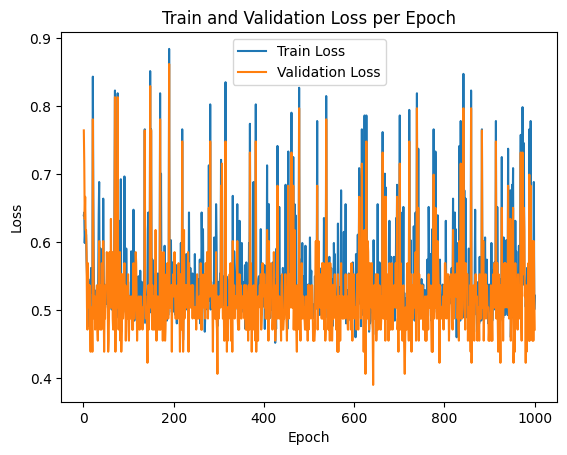

In [10]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.val_losses = []
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def simple_loss(self, y_true, y_pred):
        # Simple loss: sum of absolute differences
        return np.sum(np.abs(y_true - y_pred))

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_iters):
            # Training
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            # Calculate train loss
            train_predictions = self.predict(X_train)
            train_loss = (self.simple_loss(y_train, train_predictions))/len(y_train)
            self.train_losses.append(train_loss)

            # Calculate validation loss
            val_predictions = self.predict(X_val)
            val_loss = (self.simple_loss(y_val, val_predictions))/len(y_val)
            self.val_losses.append(val_loss)

            # Print losses for this epoch
            print(f"Epoch {epoch+1}/{self.n_iters}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()

- I can see a lot of fluctuations over all, so i'll try and reduce the learning rate.

Epoch 1/1000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 2/1000, Train Loss: 0.7739307535641547, Validation Loss: 0.8943089430894309
Epoch 3/1000, Train Loss: 0.6883910386965377, Validation Loss: 0.7804878048780488
Epoch 4/1000, Train Loss: 0.6802443991853361, Validation Loss: 0.7804878048780488
Epoch 5/1000, Train Loss: 0.6761710794297352, Validation Loss: 0.7804878048780488
Epoch 6/1000, Train Loss: 0.6843177189409368, Validation Loss: 0.7804878048780488
Epoch 7/1000, Train Loss: 0.6720977596741344, Validation Loss: 0.7967479674796748
Epoch 8/1000, Train Loss: 0.6720977596741344, Validation Loss: 0.7967479674796748
Epoch 9/1000, Train Loss: 0.6843177189409368, Validation Loss: 0.7967479674796748
Epoch 10/1000, Train Loss: 0.6924643584521385, Validation Loss: 0.7804878048780488
Epoch 11/1000, Train Loss: 0.6965376782077393, Validation Loss: 0.7967479674796748
Epoch 12/1000, Train Loss: 0.6802443991853361, Validation Loss: 0.7642276422764228
Epoch 13/1000

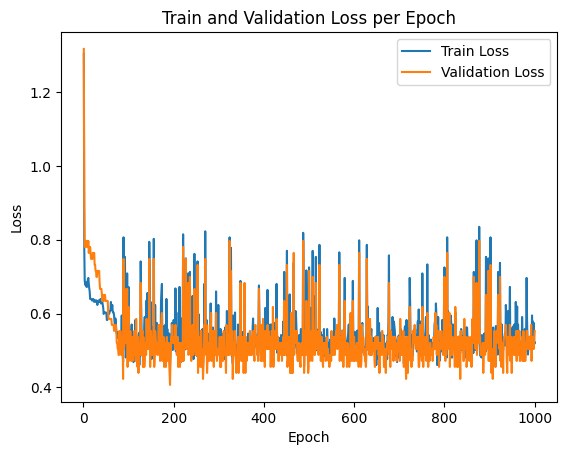

In [11]:
# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()

- At the beginning the loss seems to be decreasing and then the loss again starts to fluctuate. Hence, I would now start using learning rate decay where the learning rate will be decreased with the number of epochs.

Epoch 1/1000, LR: 0.1, Train Loss: 0.639511201629328, Validation Loss: 0.7642276422764228
Epoch 2/1000, LR: 0.09900990099009901, Train Loss: 0.639511201629328, Validation Loss: 0.7154471544715447
Epoch 3/1000, LR: 0.09706853038245002, Train Loss: 0.594704684317719, Validation Loss: 0.6178861788617886
Epoch 4/1000, LR: 0.09424129163344662, Train Loss: 0.6069246435845214, Validation Loss: 0.6666666666666666
Epoch 5/1000, LR: 0.09061662657062175, Train Loss: 0.6028513238289206, Validation Loss: 0.6504065040650406
Epoch 6/1000, LR: 0.08630154911487785, Train Loss: 0.6069246435845214, Validation Loss: 0.6178861788617886
Epoch 7/1000, LR: 0.08141655576875269, Train Loss: 0.6069246435845214, Validation Loss: 0.6178861788617886
Epoch 8/1000, LR: 0.07609023903621746, Train Loss: 0.5661914460285132, Validation Loss: 0.6178861788617886
Epoch 9/1000, LR: 0.07045392503353469, Train Loss: 0.5417515274949084, Validation Loss: 0.5203252032520326
Epoch 10/1000, LR: 0.06463662847113273, Train Loss: 0.52

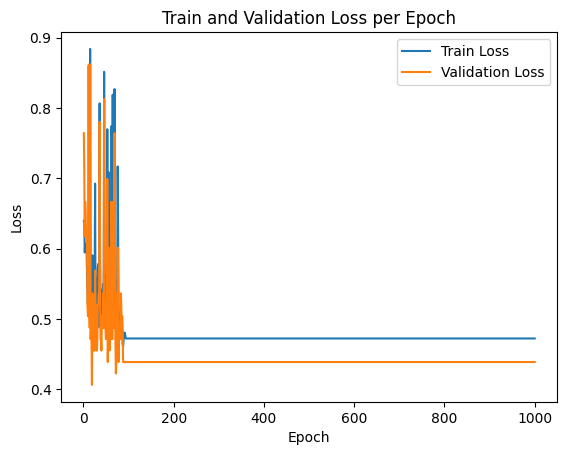

In [12]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100, decay_rate=0.001):
        self.lr = learning_rate  # Initial learning rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.decay_rate = decay_rate
        self.train_losses = []
        self.val_losses = []
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def simple_loss(self, y_true, y_pred):
        # Simple loss: sum of absolute differences
        return np.sum(np.abs(y_true - y_pred))

    def update_learning_rate(self, epoch):
        # Learning rate decay: Exponential decay
        self.lr = self.lr / (1 + self.decay_rate * epoch)

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_iters):
            # Update the learning rate with decay
            self.update_learning_rate(epoch)

            # Training
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            # Calculate train loss
            train_predictions = self.predict(X_train)
            train_loss = (self.simple_loss(y_train, train_predictions))/len(y_train)
            self.train_losses.append(train_loss)

            # Calculate validation loss
            val_predictions = self.predict(X_val)
            val_loss = (self.simple_loss(y_val, val_predictions))/len(y_val)
            self.val_losses.append(val_loss)

            # Print losses for this epoch along with the learning rate
            print(f"Epoch {epoch+1}/{self.n_iters}, LR: {self.lr}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Initialize and train the perceptron with learning rate decay
perceptron = Perceptron(learning_rate=0.1, n_iters=1000, decay_rate=0.01)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()


- After using the LR-decay the results are satisfying but it's reaching satueration somewhere around 100 epochs.
- So, I'll reduce my number of epochs to 100.

Epoch 1/100, LR: 0.1, Train Loss: 0.639511201629328, Validation Loss: 0.7642276422764228
Epoch 2/100, LR: 0.09900990099009901, Train Loss: 0.639511201629328, Validation Loss: 0.7154471544715447
Epoch 3/100, LR: 0.09706853038245002, Train Loss: 0.594704684317719, Validation Loss: 0.6178861788617886
Epoch 4/100, LR: 0.09424129163344662, Train Loss: 0.6069246435845214, Validation Loss: 0.6666666666666666
Epoch 5/100, LR: 0.09061662657062175, Train Loss: 0.6028513238289206, Validation Loss: 0.6504065040650406
Epoch 6/100, LR: 0.08630154911487785, Train Loss: 0.6069246435845214, Validation Loss: 0.6178861788617886
Epoch 7/100, LR: 0.08141655576875269, Train Loss: 0.6069246435845214, Validation Loss: 0.6178861788617886
Epoch 8/100, LR: 0.07609023903621746, Train Loss: 0.5661914460285132, Validation Loss: 0.6178861788617886
Epoch 9/100, LR: 0.07045392503353469, Train Loss: 0.5417515274949084, Validation Loss: 0.5203252032520326
Epoch 10/100, LR: 0.06463662847113273, Train Loss: 0.521384928716

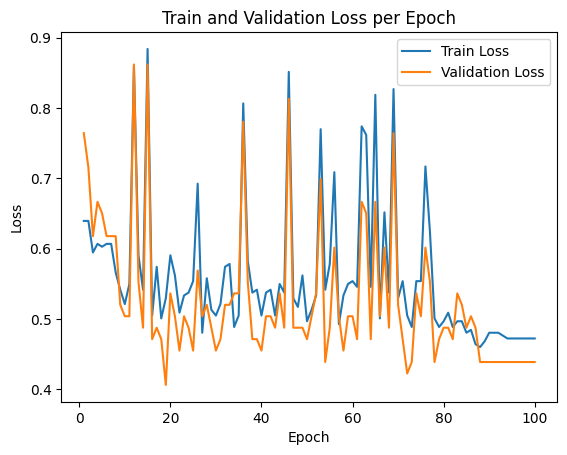

In [13]:
# Initialize and train the perceptron with learning rate decay, and a different number of iterations
perceptron = Perceptron(learning_rate=0.1, n_iters=100, decay_rate=0.01)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()

- The earlier model without LR-decay works almost as similar as this model and the model requires less computations i.e., decay computation per epoch, so i would stick with that model, with learning rate 0.1 as the results are promoising, however there are still fluctuations but i guess the order is very low which is 1e-1 so i guess this would be acceptable for this simple and very general model.

#### To improve the speed of the training let's try out using mini-batch gradient descent rather than updating at each row.

Epoch 1/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 2/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 3/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 4/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 5/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 6/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 7/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 8/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 9/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 10/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 11/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
Epoch 12/10000, Train Loss: 1.3034623217922607, Validation Loss: 1.3170731707317074
E

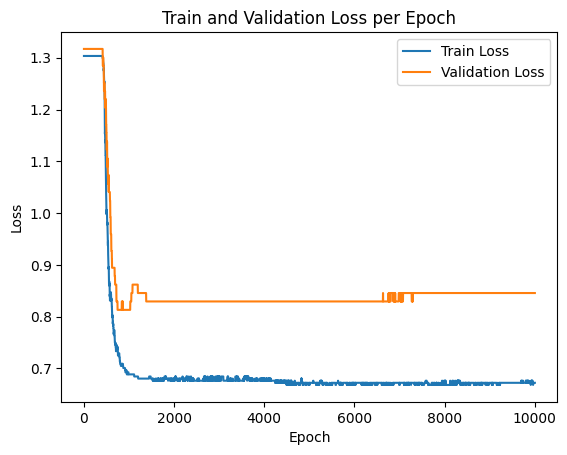

In [14]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000, batch_size=32):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.batch_size = batch_size
        self.train_losses = []
        self.val_losses = []
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def simple_loss(self, y_true, y_pred):
        # Simple loss: sum of absolute differences
        return np.sum(np.abs(y_true - y_pred))

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_iters):
            # Shuffle the data at the start of each epoch
            shuffled_indices = np.random.permutation(n_samples)
            X_train_shuffled = X_train[shuffled_indices]
            y_train_shuffled = y_train[shuffled_indices]

            # Mini-batch gradient descent
            for start in range(0, n_samples, self.batch_size):
                end = min(start + self.batch_size, n_samples)
                X_batch = X_train_shuffled[start:end]
                y_batch = y_train_shuffled[start:end]

                # Compute the predictions for the batch
                linear_output = np.dot(X_batch, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule for each mini-batch
                update = self.lr * np.mean(y_batch - y_predicted)
                self.weights += update * np.mean(X_batch, axis=0)
                self.bias += update

            # Calculate train loss
            train_predictions = self.predict(X_train)
            train_loss = (self.simple_loss(y_train, train_predictions))/len(y_train)
            self.train_losses.append(train_loss)

            # Calculate validation loss
            val_predictions = self.predict(X_val)
            val_loss = (self.simple_loss(y_val, val_predictions))/len(y_val)
            self.val_losses.append(val_loss)

            # Print losses for this epoch
            print(f"Epoch {epoch+1}/{self.n_iters}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

# Example usage:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Initialize and train the perceptron with mini-batch gradient descent
perceptron = Perceptron(learning_rate=0.001, n_iters=10000, batch_size=32)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()


- I can definitely say the overall model performance is very fast but even after reaching 10000 epochs at a very low learning rate i.e 0.01 and 0.001, the model perfomance is not better than the simpler model. 

#### Final Model with Experimentation considerations:
    - After considering all the above experiments i am finally satisfied with the model with 0.1 learning rate and 1000 iterations without any learning rate deacy or batch gradient descent techniques.
    - at this setting both val_loss and train_loss are almost similar and we can be sure that there's no over fitting.
    - Considering all these facts i designed my final model with above mentioned parameters.

Epoch 1/1000, Train Loss: 0.6775244299674267, Validation Loss: 0.7642276422764228
Epoch 2/1000, Train Loss: 0.6612377850162866, Validation Loss: 0.7154471544715447
Epoch 3/1000, Train Loss: 0.6254071661237784, Validation Loss: 0.6504065040650406
Epoch 4/1000, Train Loss: 0.5928338762214984, Validation Loss: 0.6504065040650406
Epoch 5/1000, Train Loss: 0.5863192182410424, Validation Loss: 0.6341463414634146
Epoch 6/1000, Train Loss: 0.5960912052117264, Validation Loss: 0.6341463414634146
Epoch 7/1000, Train Loss: 0.5276872964169381, Validation Loss: 0.5040650406504065
Epoch 8/1000, Train Loss: 0.48859934853420195, Validation Loss: 0.45528455284552843
Epoch 9/1000, Train Loss: 0.46579804560260585, Validation Loss: 0.43902439024390244
Epoch 10/1000, Train Loss: 0.4755700325732899, Validation Loss: 0.42276422764227645
Epoch 11/1000, Train Loss: 0.46905537459283386, Validation Loss: 0.4065040650406504
Epoch 12/1000, Train Loss: 0.4755700325732899, Validation Loss: 0.45528455284552843
Epoch 

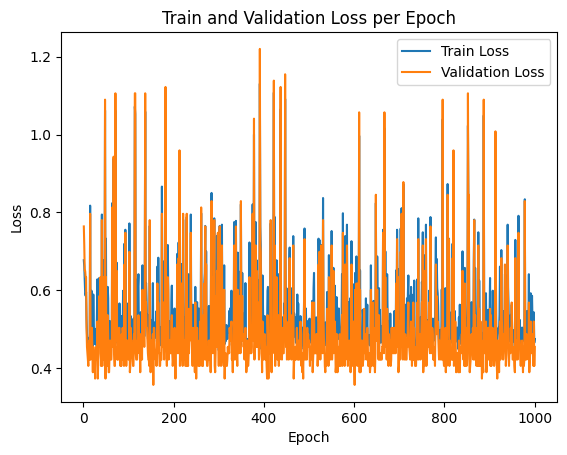

In [19]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.val_losses = []
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def simple_loss(self, y_true, y_pred):
        # Simple loss: sum of absolute differences
        return np.sum(np.abs(y_true - y_pred))

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_iters):
            # Training
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

            # Calculate train loss
            train_predictions = self.predict(X_train)
            train_loss = (self.simple_loss(y_train, train_predictions))/len(y_train)
            self.train_losses.append(train_loss)

            # Calculate validation loss
            val_predictions = self.predict(X_val)
            val_loss = (self.simple_loss(y_val, val_predictions))/len(y_val)
            self.val_losses.append(val_loss)

            # Print losses for this epoch
            print(f"Epoch {epoch+1}/{self.n_iters}, Train Loss: {train_loss}, Validation Loss: {val_loss}")
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train, y_train, X_val, y_val)

# Make predictions
predictions = perceptron.predict(X_val)
print("Predictions:", (predictions == y_val).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_val, predictions)
print("Validation Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_val, predictions)
print("Validation F1 Score:", f1)

# Plotting Train and Validation Loss
plt.plot(range(1, perceptron.n_iters + 1), perceptron.train_losses, label='Train Loss')
plt.plot(range(1, perceptron.n_iters + 1), perceptron.val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.show()

- Finally the F1- score seems to be satisying and the accuracy is not bad either.
- Hence i'm going to finalize this model for my final testing, to eliminate unnecessary print statements and graphs i am rewriting the entire code removing all those extra blocks of code.
- I'm also including the combination of Train and validation sets to train with full training data set. So that we will have more data to train the model.

In [21]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.val_losses = []
    
    def sigmoid_function(self, x):
        k = (1 / (1 + np.exp(-x))).astype(int)
        return np.where(k >= 0.5, 1, -1)
    
    def simple_loss(self, y_true, y_pred):
        # Simple loss: sum of absolute differences
        return np.sum(np.abs(y_true - y_pred))

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Training loop
        for epoch in range(self.n_iters):
            # Training
            for idx, x_i in enumerate(X_train):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.sigmoid_function(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_train[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.sigmoid_function(linear_output)

X_train = np.array(X_train_full)
y_train = np.array(y_train_full)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Initialize and train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iters=1000)
perceptron.fit(X_train_full, y_train_full)

# Make predictions
predictions = perceptron.predict(X_test)
print("Predictions:", (predictions == y_test).astype(int))

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

# Evaluate the model using f1_score
f1 = f1_score(y_test, predictions)
print("Test F1 Score:", f1)

Predictions: [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 0 1]
Test Accuracy: 0.7987012987012987
Test F1 Score: 0.8558139534883721


- Now as we i am expecting since we are using more data to train with, both the metrics are now improved to the values which are even better considering all the previous cases.

#### To plot the individual true positives, false positives, true negatives and false negatives in a single plot I am using confusion matrix from seaborn library as below.

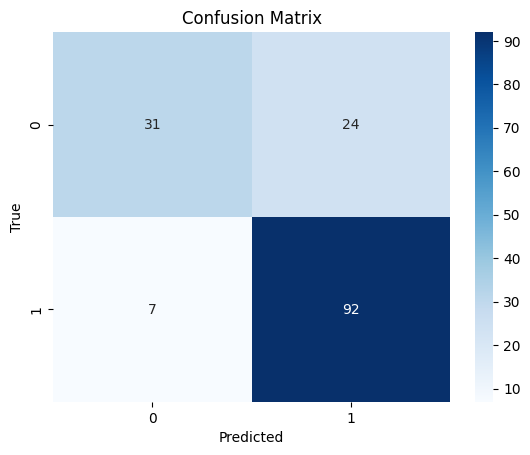

In [22]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

- From the above confusion matrix we can clearly see that majority of the misclassifications are class 0 i.e., no diabetes is classified as positive which is acceptable as in medical applications giving positive negative person is better than negative to positive person as if a person is positive he/she will undergo more tests and eventually learn the fact that it's an error but not the case when a patient recieved a negative output.
- This fact is also reasonable as the initial data set has more positive cases compared to the negative cases and the model tend to be biased in this case. Hence, it is important to keep the data as much balanced as possible.
- However, when we compute the ratio the margin of error seems to be similar to both cases.